#### XOR - Logistic Regression - Eager Excuetion

기본 라이브러리 및 Tensorflow 버전 확인

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

tf.random.set_seed(777)

print(tf.__version__)

2.5.0


x_data가 2차원 배열이기 때문에 2차원 공간에 표현하여 x1과 x2를 기준으로 y_data 0과 1로 구분</br>
붉은 색과 푸른 색으로 0과 1을 표시

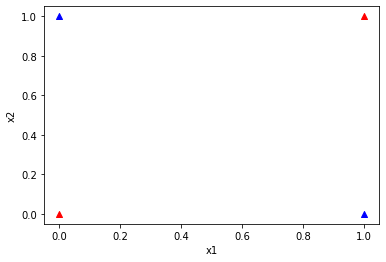

In [ ]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1]]

y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#### Tensorflow Eager

- Tensorflow data API를 통해 학습시킬 값들을 담는다.(Batch size는 한 번에 학습시킬 size로 정한다.)
- preprocess function으로 features, labels는 실제 학습에 쓰일 data 연산을 위해 type을 맞춰준다.

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(feature, labels):
  feature = tf.cast(feature, tf.float32)
  labels = tf.cast(labels, tf.float32)
  return feature, labels

W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 bias임</br>


In [ ]:
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


Sigmoid 함수를 가설로 선언
- sigmoid는 0과 1값만을 리턴함
-  tf.sigmoid(tf.matmul(X, W) + b)

In [ ]:
def logistic_regression(features):
  hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
  return hypothesis

가설을 검증할 cast 함수를 정의함

In [ ]:
def loss_fn(hypothesis, features, labels):
  cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)


추론한 값은 0.5를 기준으로 0과 1의 값을 리턴함
- sigmoid 함수를 통해 예측한 값이 0.5보다 크면 1을, 작으면 0을 반환한다.

In [ ]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

GradientTape을 통해 경사값을 계산함

In [ ]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [ ]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


#### Neural Network를 통해 xor 해결하기
- data를 3Layer의 Neural Network를 통해 학습시킨 후 모델을 생성

In [ ]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [ ]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [ ]:

EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.8487
Iter: 5000, Loss: 0.6847
Iter: 10000, Loss: 0.6610
Iter: 15000, Loss: 0.6154
Iter: 20000, Loss: 0.5722
Iter: 25000, Loss: 0.5433
Iter: 30000, Loss: 0.5211
Iter: 35000, Loss: 0.4911
Iter: 40000, Loss: 0.4416
Iter: 45000, Loss: 0.3313
Testset Accuracy: 1.0000


#### Deep Neural Network로 XOR 해결하기

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost

    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [ ]:
model = wide_deep_nn(nb_classes)

In [ ]:
model.fit(dataset)

Iter: 0, Loss: 0.7717
Iter: 500, Loss: 0.6877
Iter: 1000, Loss: 0.6868
Iter: 1500, Loss: 0.6859
Iter: 2000, Loss: 0.6848
Iter: 2500, Loss: 0.6838
Iter: 3000, Loss: 0.6826
Iter: 3500, Loss: 0.6813
Iter: 4000, Loss: 0.6798
Iter: 4500, Loss: 0.6783
Iter: 5000, Loss: 0.6765
Iter: 5500, Loss: 0.6744
Iter: 6000, Loss: 0.6721
Iter: 6500, Loss: 0.6694
Iter: 7000, Loss: 0.6662
Iter: 7500, Loss: 0.6624
Iter: 8000, Loss: 0.6580
Iter: 8500, Loss: 0.6526
Iter: 9000, Loss: 0.6460
Iter: 9500, Loss: 0.6379
Iter: 10000, Loss: 0.6280
Iter: 10500, Loss: 0.6156
Iter: 11000, Loss: 0.6004
Iter: 11500, Loss: 0.5814
Iter: 12000, Loss: 0.5582
Iter: 12500, Loss: 0.5298
Iter: 13000, Loss: 0.4954
Iter: 13500, Loss: 0.4543
Iter: 14000, Loss: 0.4065
Iter: 14500, Loss: 0.3533
Iter: 15000, Loss: 0.2978
Iter: 15500, Loss: 0.2443
Iter: 16000, Loss: 0.1970
Iter: 16500, Loss: 0.1579
Iter: 17000, Loss: 0.1271
Iter: 17500, Loss: 0.1034
Iter: 18000, Loss: 0.0853
Iter: 18500, Loss: 0.0714
Iter: 19000, Loss: 0.0606
Iter: 1950

In [ ]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000
